# import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load csv file
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check Data Set

In [3]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train_data.shape

(1460, 81)

In [5]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Check for null values

In [7]:
missing_values = train_data.isnull().sum()
pd.set_option('display.max_rows', None)
print(missing_values)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

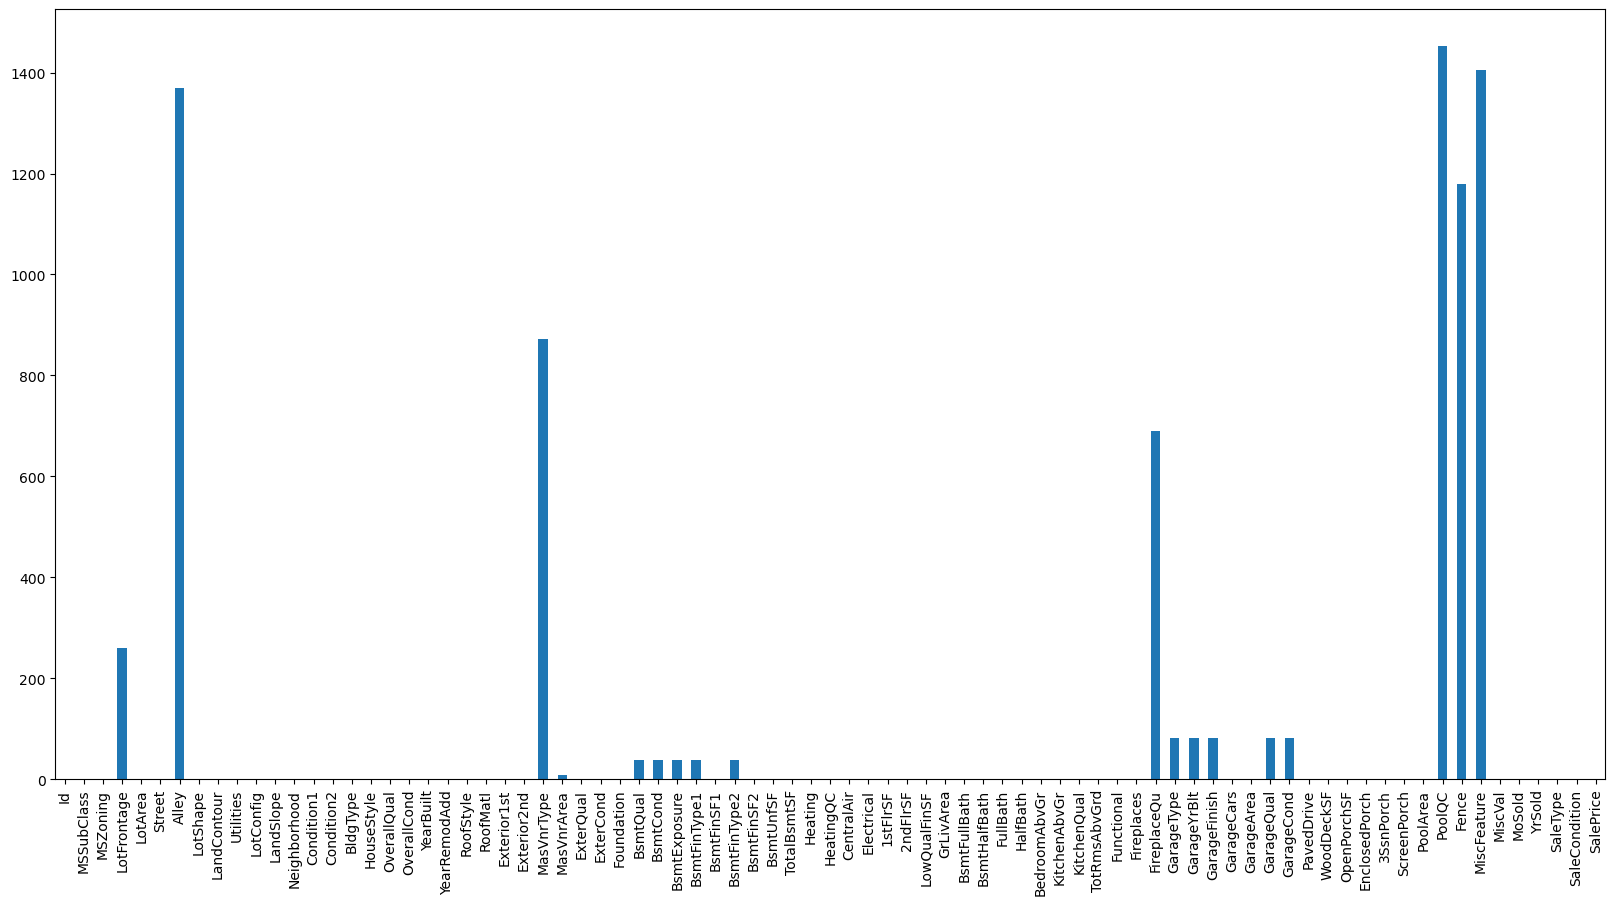

In [8]:
plt.figure(figsize = (20,10))
train_data.isnull().sum().plot(kind="bar")
plt.show()

In [9]:
len(train_data)

1460

# Drop columns if the percentage more than 47%

In [10]:
# Select quantitative (numerical) columns
quantitative_cols_train = train_data.select_dtypes(include=['int64', 'float64']).columns
quantitative_cols_test = test_data.select_dtypes(include=['int64', 'float64']).columns
# Calculate percentage of missing values for quantitative columns in train_data
missing_values_quant_train = train_data[quantitative_cols_train].isnull().sum() / len(train_data) * 100
missing_values_quant_test = test_data[quantitative_cols_test].isnull().sum() / len(test_data) * 100
print(missing_values_quant_train)
print('\n')
print(missing_values_quant_test)
# Specify the threshold for quantitative columns
threshold_quant = 47

# List of quantitative columns to drop for train_data
columns_to_drop_quant_train = missing_values_quant_train[missing_values_quant_train > threshold_quant].index.tolist()
columns_to_drop_quant_test = missing_values_quant_test[missing_values_quant_test > threshold_quant].index.tolist()
columns_to_drop_quant_train.extend(['Id'])

columns_to_drop_quant_train

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

['Id']

In [11]:
# Drop the quantitative columns from train_data
train_data.drop(columns=columns_to_drop_quant_train, inplace=True)
test_data.drop(columns=columns_to_drop_quant_test, inplace=True)

# Print the quantitative columns dropped for train_data
print("Quantitative columns dropped for train_data:", columns_to_drop_quant_train)
print("Quantitative columns dropped for test_data:", columns_to_drop_quant_test)

Quantitative columns dropped for train_data: ['Id']
Quantitative columns dropped for test_data: []


In [12]:
# Select qualitative (categorical) columns
qualitative_cols_train = train_data.select_dtypes(include=['object']).columns
qualitative_cols_test = test_data.select_dtypes(include=['object']).columns

# Calculate percentage of missing values for qualitative columns in train_data
missing_values_qual_train = train_data[qualitative_cols_train].isnull().sum() / len(train_data) * 100
print(missing_values_qual_train)

missing_values_qual_test = test_data[qualitative_cols_test].isnull().sum() / len(test_data) * 100
print(missing_values_qual_test)
# Specify the threshold for qualitative columns
threshold_qual = 47

# List of qualitative columns to drop for train_data
columns_to_drop_qual_train = missing_values_qual_train[missing_values_qual_train > threshold_qual].index.tolist()
columns_to_drop_qual_test = missing_values_qual_test[missing_values_qual_test > threshold_qual].index.tolist()
columns_to_drop_qual_train



MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
# Drop the qualitative columns from train_data
train_data.drop(columns=columns_to_drop_qual_train, inplace=True)
test_data.drop(columns=columns_to_drop_qual_test, inplace=True)
# Print the qualitative columns dropped for train_data
print("Qualitative columns dropped for train_data:", columns_to_drop_qual_train)
print("Qualitative columns dropped for test_data:", columns_to_drop_qual_test)

Qualitative columns dropped for train_data: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Qualitative columns dropped for test_data: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [14]:
train_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 74 columns]

In [15]:
train_data.shape

(1460, 74)

In [16]:
train_data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

# Fill missing values

In [17]:
# Fill missing values for categorical columns with mode
categorical_cols_train = train_data.select_dtypes(include=['object']).columns
train_data[categorical_cols_train] = train_data[categorical_cols_train].fillna(train_data[categorical_cols_train].mode().iloc[0])

categorical_cols_test = test_data.select_dtypes(include=['object']).columns
test_data[categorical_cols_test] = test_data[categorical_cols_test].fillna(test_data[categorical_cols_test].mode().iloc[0])

# Fill missing values for numerical columns with mean
numerical_cols_train = train_data.select_dtypes(include=['int', 'float']).columns
train_data[numerical_cols_train] = train_data[numerical_cols_train].fillna(train_data[numerical_cols_train].mean())

# Fill missing values for numerical columns with mean
numerical_cols_test = test_data.select_dtypes(include=['int', 'float']).columns
test_data[numerical_cols_test] = test_data[numerical_cols_test].fillna(test_data[numerical_cols_test].mean())

# Verify if there are any more missing values
missing_values_after_train = train_data.isnull().sum()
print("Remaining train missing values:\n", missing_values_after_train[missing_values_after_train > 0])

missing_values_after_test = test_data.isnull().sum()
print("Remaining train missing values:\n", missing_values_after_test[missing_values_after_test > 0])


Remaining train missing values:
 Series([], dtype: int64)
Remaining train missing values:
 Series([], dtype: int64)


# Encode categorical columns

In [18]:
from sklearn.preprocessing import LabelEncoder

# Select qualitative (categorical) columns for label encoding
qualitative_cols_train = train_data.select_dtypes(include=['object']).columns
qualitative_cols_test = test_data.select_dtypes(include=['object']).columns
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in qualitative_cols_train:
    train_data[col] = label_encoder.fit_transform(train_data[col])

for col in qualitative_cols_test:
    test_data[col] = label_encoder.fit_transform(test_data[col])

train_data_encoded = train_data
test_data_encoded = test_data

In [19]:
train_data_encoded.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          2          0  ...              0          0   
2          0          4          0  ...              0          0   
3          0          0          0  ...            272          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8              4   
1            0         0        0       5    2007         8              4   
2            0         0        0       9    2008         8              4   
3            0         0        0       2    2006         8              0   
4            0         0        0      12    2008         8              4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 74 columns]

In [20]:
train_data_encoded.shape

(1460, 74)

# find correlations between quantitative columns

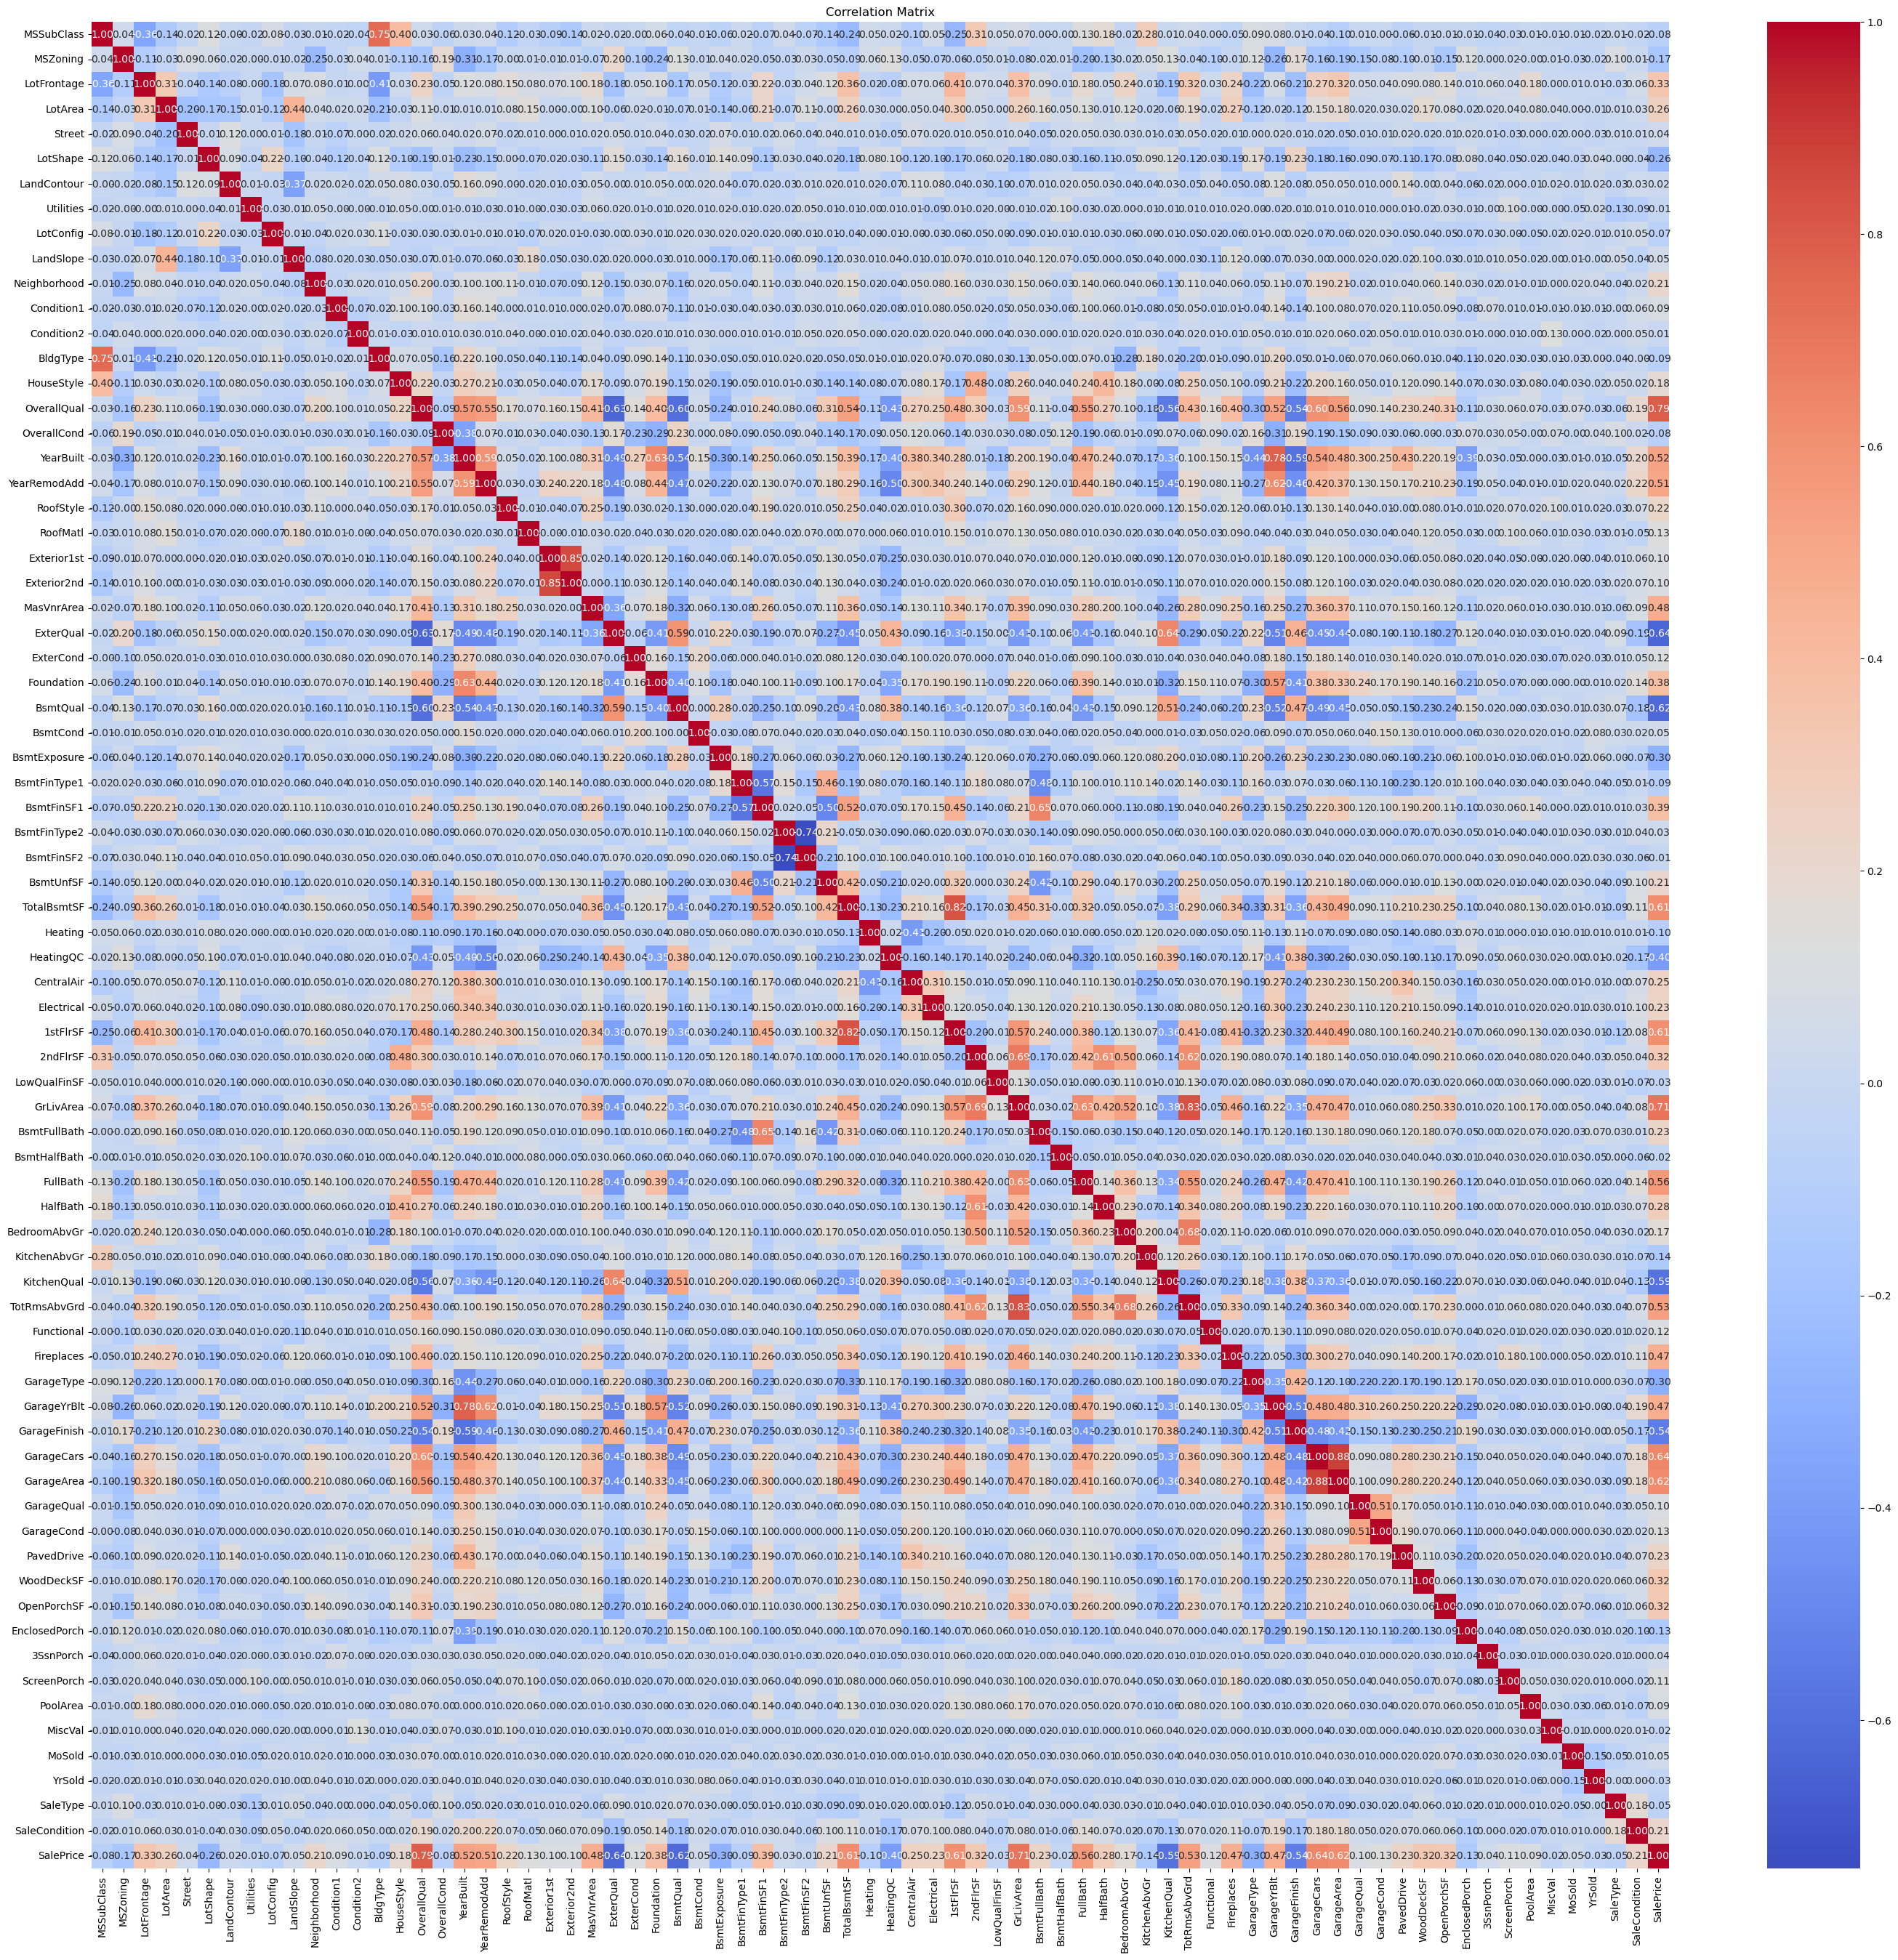

In [21]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()
# correlation_matrix = train_data_encoded.corr()

# Create a heatmap
plt.figure(figsize=(35, 33))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# find correlations between encoded all columns

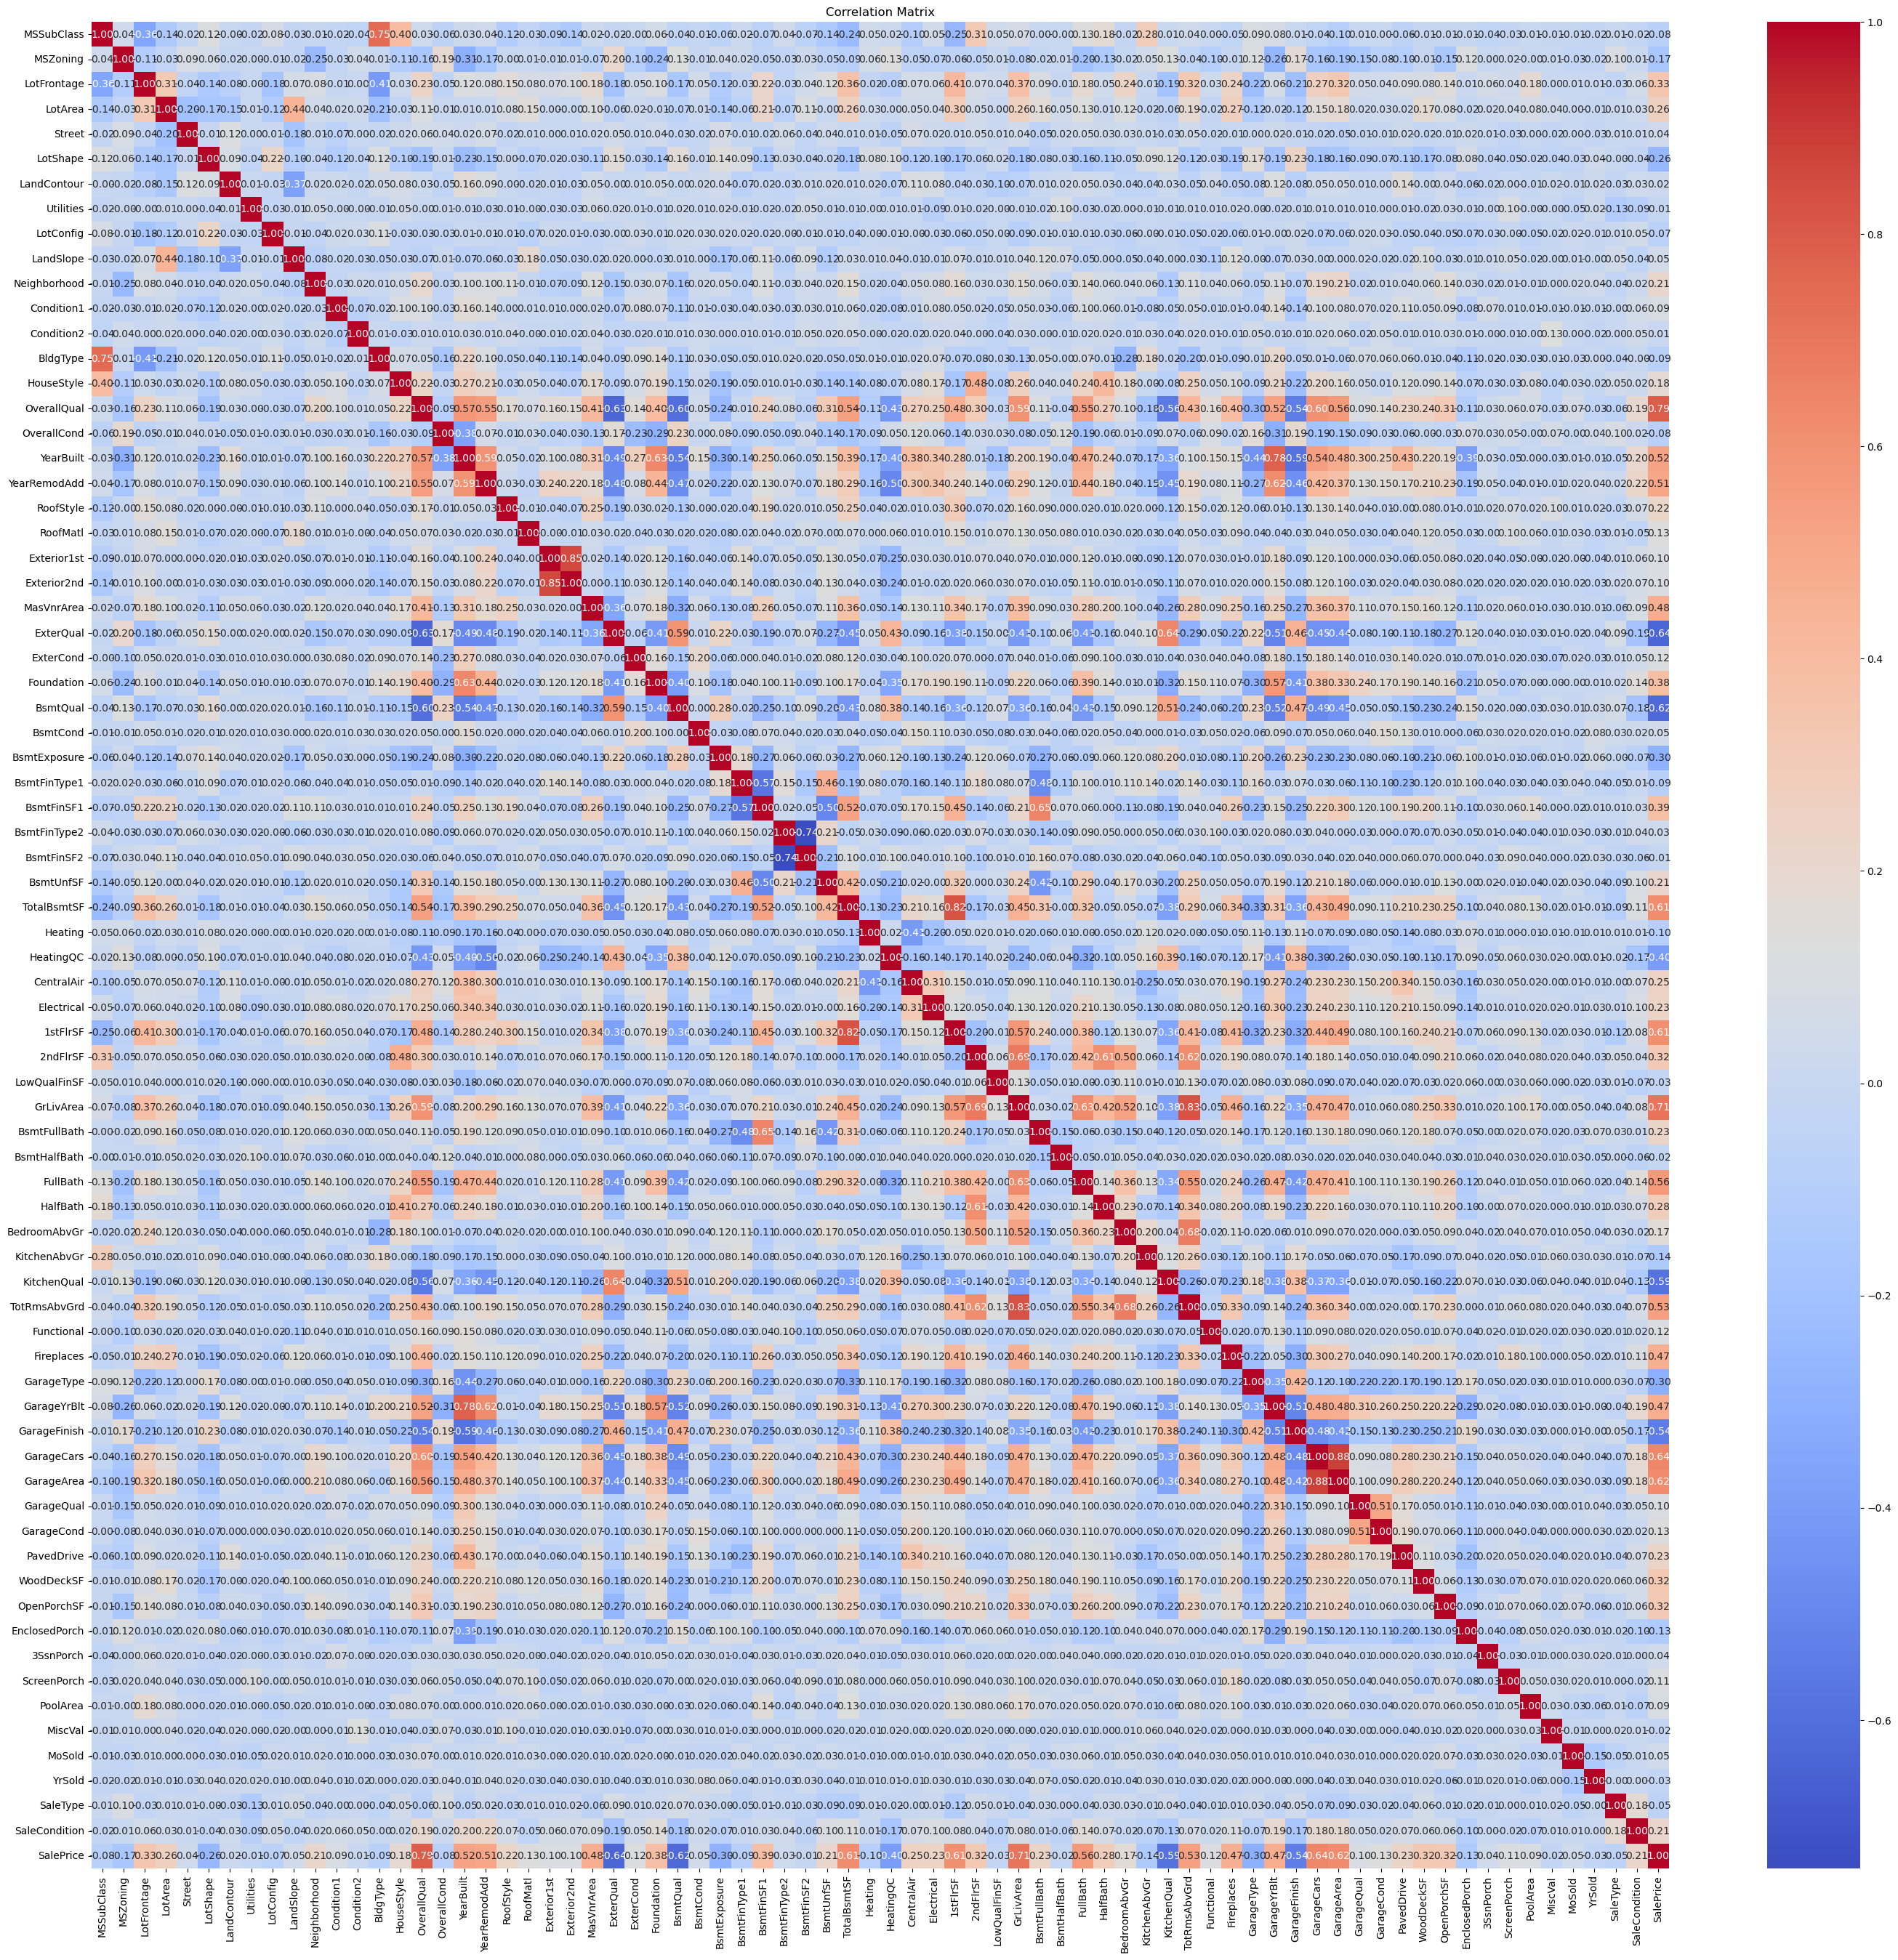

In [22]:
# Calculate the correlation matrix
# correlation_matrix = train_data.corr()
correlation_matrix = train_data_encoded.corr()

# Create a heatmap
plt.figure(figsize=(35, 33))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Calculate the correlation of all features with SalePrice

In [23]:
saleprice_correlation_train = train_data_encoded.corr()['SalePrice'].sort_values(ascending=False)

print(saleprice_correlation_train)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
Electrical       0.234945
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
BedroomAbvGr     0.168213
GarageCond       0.134740
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
ScreenPorch      0.111447
Exterior2nd      0.103766
Exterior1st 

# select data where correlation is greater than 0.1

In [24]:
threshold = 0.1
significant_features = saleprice_correlation_train[abs(saleprice_correlation_train) > threshold].index.tolist()

# Keep only the significant features in your data
train_data_selected = train_data_encoded[significant_features]
train_data_selected.head()

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  ...  KitchenAbvGr  MSZoning  \
0       856         2             8       2003  ...             1         3   
1      1262         2             6       1976  ...             1         3   
2       920         2             6       2001  ...             1         3   
3       961         1             7       1915  ...             1         3   
4      1145         2             9       2000  ...             1         3   

   LotShape  BsmtExposure  GarageType  HeatingQC  GarageFinish  KitchenQual  \
0         3             3           1          0             1            2   
1         3             1           1          0             1            3   
2         0             2           1          0             1            2   
3         0             3           5          2             2            2   
4         0             0           1          0             1            2   

   BsmtQual  ExterQual  
0         2          2  
1         2          3  
2         2          2  
3         3          3  
4         2          2  

[5 rows x 50 columns]

# train model to predict price

In [25]:
X = train_data_selected.drop('SalePrice', axis=1)
y = train_data_selected['SalePrice']

In [26]:
# Assuming X_train_selected and y_train are your selected features and target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize a dictionary to store the evaluation metrics
model_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit model to training data
    y_pred = model.predict(X_test)  # Predict on test data

    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared

    # Store metrics in the dictionary
    model_metrics[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2
    }

# Print the metrics for each model
for name, metrics in model_metrics.items():
    print(f"{name} Metrics:")
    print(f" MAE: {metrics['MAE']:.2f}")
    print(f" MSE: {metrics['MSE']:.2f}")
    print(f" RMSE: {metrics['RMSE']:.2f}")
    print(f" R^2: {metrics['R^2']:.2f}\n")


Gradient Boosting Metrics:
 MAE: 17186.00
 MSE: 795983200.42
 RMSE: 28213.17
 R^2: 0.90

Random Forest Metrics:
 MAE: 17768.02
 MSE: 823565297.79
 RMSE: 28697.83
 R^2: 0.89

Linear Regression Metrics:
 MAE: 21911.46
 MSE: 1202028895.16
 RMSE: 34670.29
 R^2: 0.84

XGBoost Metrics:
 MAE: 17647.90
 MSE: 725430484.06
 RMSE: 26933.82
 R^2: 0.91



# aligning Columns between Training and Testing Data

In [29]:
common_columns = train_data_selected.columns.intersection(test_data_encoded.columns)

# Ensure both DataFrames have the same columns
train_data_selected = train_data_selected[common_columns]
test_data_aligned = test_data_encoded[common_columns]


In [30]:
train_data_selected.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  ...  KitchenAbvGr  \
0         2             8       2003          2003  ...             1   
1         2             6       1976          1976  ...             1   
2         2             6       2001          2002  ...             1   
3         1             7       1915          1970  ...             1   
4         2             9       2000          2000  ...             1   

   MSZoning  LotShape  BsmtExposure  GarageType  HeatingQC  GarageFinish  \
0         3         3             3           1          0             1   
1         3         3             1           1          0             1   
2         3         0             2           1          0             1   
3         3         0             3           5          2             2   
4         3         0             0           1          0             1   

   KitchenQual  BsmtQual  ExterQual  
0            2         2          2  
1            3         2          3  
2            2         2          2  
3            2         3          3  
4            2         2          2  

[5 rows x 49 columns]

In [31]:
test_data_aligned.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            5        896         1.0       730.0        882.0       896   
1            6       1329         1.0       312.0       1329.0      1329   
2            5       1629         2.0       482.0        928.0       928   
3            6       1604         2.0       470.0        926.0       926   
4            8       1280         2.0       506.0       1280.0      1280   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  ...  KitchenAbvGr  \
0         1             5       1961          1961  ...             1   
1         1             6       1958          1958  ...             1   
2         2             6       1997          1998  ...             1   
3         2             7       1998          1998  ...             1   
4         2             5       1992          1992  ...             1   

   MSZoning  LotShape  BsmtExposure  GarageType  HeatingQC  GarageFinish  \
0         2         3             3           1          4             2   
1         3         0             3           1          4             2   
2         3         0             3           1          2             0   
3         3         0             3           1          0             0   
4         3         0             3           1          0             1   

   KitchenQual  BsmtQual  ExterQual  
0            3         3          3  
1            2         3          3  
2            3         2          3  
3            2         3          3  
4            2         2          2  

[5 rows x 49 columns]

# Train model using Gradient Boosting Regressor

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = gb_regressor.predict(X_train)

# Making predictions on the test set
y_test_pred = gb_regressor.predict(test_data_aligned)

# Create a DataFrame for the predictions
predictions_df_gb = pd.DataFrame({'Id': test_data_encoded['Id'], 'SalePrice': y_test_pred})


In [33]:
predictions_df_gb.head()


Id      SalePrice
0  1461  119681.030892
1  1462  150820.476729
2  1463  179164.591338
3  1464  186142.560705
4  1465  202954.286141

In [34]:
# Train model using Random Forest Regressor

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_regressor.predict(X_train)

# Making predictions on the test set
y_test_pred = rf_regressor.predict(test_data_aligned)

# Create a DataFrame for the predictions
predictions_df_rf = pd.DataFrame({'Id': test_data_encoded['Id'], 'SalePrice': y_test_pred})


In [36]:
# final predicted SalePrice - Random Forest Regressor

In [37]:
predictions_df_rf.head()


Id  SalePrice
0  1461  129699.33
1  1462  154756.00
2  1463  180731.04
3  1464  188042.80
4  1465  204789.00

In [38]:
# Train model using Linear Regression

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = lr_model.predict(X_train)

# Making predictions on the test set
y_test_pred = lr_model.predict(test_data_aligned)

# Create a DataFrame for the predictions
predictions_df_lr = pd.DataFrame({'Id': test_data_encoded['Id'], 'SalePrice': y_test_pred})


In [40]:
# final predicted SalePrice -  Linear Regression

In [41]:
predictions_df_lr.head()

Id      SalePrice
0  1461  107905.076903
1  1462  157609.963437
2  1463  166622.119951
3  1464  181282.779054
4  1465  205044.200887

In [42]:
# Train model using XGBRegressor

In [43]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgb_model.predict(X_train)

# Making predictions on the test set
y_test_pred = xgb_model.predict(test_data_aligned)

# Create a DataFrame for the predictions
predictions_df_xgb = pd.DataFrame({'Id': test_data_encoded['Id'], 'SalePrice': y_test_pred})

# You might want to save or print the predictions
# predictions_df_xgb.to_csv('xgb_predictions.csv', index=False)
# print(predictions_df_xgb.head())


In [44]:
# final predicted SalePrice - XGBRegressor 

In [45]:
predictions_df_xgb.head()

Id      SalePrice
0  1461  120654.507812
1  1462  151773.625000
2  1463  175960.390625
3  1464  186821.593750
4  1465  196615.796875

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize a dictionary to store the evaluation metrics
model_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit model to training data
    y_pred = model.predict(X_test)  # Predict on test data

    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared

    # Store metrics in the dictionary
    model_metrics[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2
    }

# Print the metrics for each model
for name, metrics in model_metrics.items():
    print(f"{name} Metrics:")
    print(f" MAE: {metrics['MAE']:.2f}")
    print(f" MSE: {metrics['MSE']:.2f}")
    print(f" RMSE: {metrics['RMSE']:.2f}")
    print(f" R^2: {metrics['R^2']:.2f}\n")

Gradient Boosting Metrics:
 MAE: 17186.00
 MSE: 795983200.42
 RMSE: 28213.17
 R^2: 0.90

Random Forest Metrics:
 MAE: 17768.02
 MSE: 823565297.79
 RMSE: 28697.83
 R^2: 0.89

Linear Regression Metrics:
 MAE: 21911.46
 MSE: 1202028895.16
 RMSE: 34670.29
 R^2: 0.84

XGBoost Metrics:
 MAE: 17647.90
 MSE: 725430484.06
 RMSE: 26933.82
 R^2: 0.91

